In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
import networkx as nx
from collections import deque

Leeremos el grafo desde nuestro csv

In [2]:
# Importamos nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/Proyecto Combinatorial COVID/corrected_graph.csv'
csv_grafo = pd.read_csv(path)
csv_grafo.head()
#csv_grafo[csv_grafo['direccion'] == 9999]

,Unnamed: 0,self,other,red_id,direccion,notas
0,0,146338,146339,159250,0,Success
1,1,146339,139543,159251,0,Success
2,2,146340,139542,159252,0,Success
3,3,146340,146336,159253,0,Success
4,4,146337,146336,159254,0,Success


Instanciamos el grafo

In [4]:
G = nx.DiGraph()
for index, row in csv_grafo.iterrows():
  origin = row['self']
  dest = row['other']
  d = row['direccion']
  if d != 9999:   # Ignoramos los nodos a los que les falta información
    G.add_edge(origin, dest)
for node in G.nodes:
  G.nodes[node]['weight'] = 100 #Asumimos tener 100 personas por nodo en primera instancia

In [5]:
#nx.draw(G, with_labels=True)
#plt.show()

In [6]:
def collapse_cicles(Graph, limit):
  G = Graph.to_undirected()
  cicles = nx.algorithms.cycles.cycle_basis(G)
  ignored = list()
  skipped = list()
  new = len(G.nodes) + 1
  
  while cicles: 
    cicle = cicles.pop()
    cicle_weight =  sum([G.nodes[i]['weight'] for i in cicle])
    # Todos los nodos dentro de los ciclos
    cicle_nodes = [item for sublist in cicles for item in sublist]

    # obtemos los vecinos del ciclo y expandimos la lista
    predecessors = [Graph.predecessors(i) for i in cicle]
    predecessors = [item for sublist in predecessors for item in sublist]
    successors = [Graph.successors(i) for i in cicle]
    successors = [item for sublist in successors for item in sublist]

    # Agregamos el nodo que reemplazará el ciclo. Agregamos las aristas correspondientes y su peso. 
    if cicle_weight <= limit:
      G.add_node(new)
      G.nodes[new]['weight'] = cicle_weight
      Graph.add_node(new)
      Graph.nodes[new]['weight'] = cicle_weight

      # Agregamos los nodos que entran y que salen del ciclo
      for node in predecessors:
        if node not in cicle_nodes:
          G.add_edge(node, new)
          Graph.add_edge(node, new)
      for node in successors:
        if node not in cicle_nodes:
          G.add_edge(new, node)
          Graph.add_edge(new, node)
      # Removemos los nodos del ciclo
      for node in cicle:
        G.remove_node(node)
        Graph.remove_node(node)
      new += 1
    else:
      ignored.append(cicle)
      skipped.append(cicle_weight)

    # Actualizamos la lista de ciclos ya que puede cambiar. Ignoramos aquellos por los que pasamos pero que eran 
    # muy numerosos para comprimirlos
    cicles = [i for i in nx.algorithms.cycles.cycle_basis(G) if i not in ignored]
    cicle_nodes = [item for sublist in cicles for item in sublist]
  return Graph, skipped

In [7]:
G1 = G.copy()
print(f'nodos iniciales: {len(G1.nodes)}')
corrected, skipped = collapse_cicles(G1, 5000)
print(f'nodos finales: {len(corrected.nodes)}')
print(f'cantidad de ciclos sin eliminar {len(skipped)}')

nodos iniciales: 24545
nodos finales: 18900
cantidad de ciclos sin eliminar 1740


## Instancia San Pedro 

In [23]:
path = '/content/drive/My Drive/Proyecto Combinatorial COVID/San_pedro_network_ids.csv'
san_pedro_csv = pd.read_csv(path)
san_pedro_csv.head()

,Unnamed: 0,self,other,edge
0,0,16381,16389,14981
1,1,16360,16372,14294
2,2,16285,16396,14295
3,3,16395,14079,14605
4,4,16410,16427,14857


In [19]:
G_sp = nx.DiGraph()
for index, row in san_pedro_csv.iterrows():
  origin = row['self']
  dest = row['other']
  G_sp.add_edge(origin, dest)
for node in G_sp.nodes:
  G_sp.nodes[node]['weight'] = 100 #Asumimos tener 100 personas por nodo en primera instancia

In [24]:
G2 = G_sp.copy()
print(f'nodos iniciales: {len(G2.nodes)}')
corrected_sp, skipped = collapse_cicles(G2, 2000)
print(f'nodos finales: {len(corrected_sp.nodes)}')
print(f'cantidad de ciclos sin eliminar {len(skipped)}')

nodos iniciales: 4604
nodos finales: 4003
cantidad de ciclos sin eliminar 22


In [30]:
#save_graph(corrected_sp,"corrected_sp.pdf")

# Pruebas

Partiremos instanciando un arbol arbitrario al que le agregaremos aristas extras con el fin de crear ciclos.

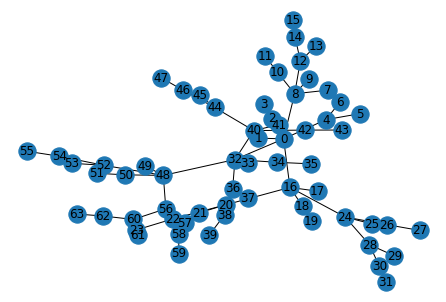

In [ ]:
almost_tree = nx.generators.classic.binomial_tree(6)
almost_tree.add_edge(7,8)
almost_tree.add_edge(25,26)
almost_tree.add_edge(51,52)
for node in almost_tree.nodes():
  almost_tree.nodes[node]['weight'] = 10
nx.draw(almost_tree, with_labels=True)
plt.show()

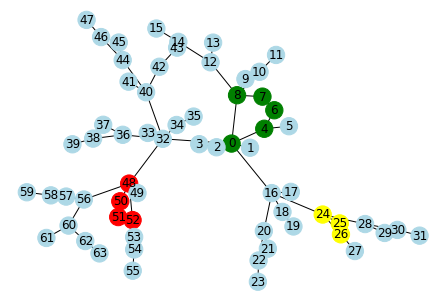

In [ ]:
cicles = nx.algorithms.cycles.cycle_basis(almost_tree)
# Graficamos cuales son estos ciclos
color_map = []
for node in almost_tree:
    if node in cicles[0]:
        color_map.append('red')
    elif node in cicles[1]:
        color_map.append('yellow')
    elif node in cicles[2]:
        color_map.append('green')
    else: 
        color_map.append('lightblue')      
nx.draw(almost_tree, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
cicles
weights =  [almost_tree.nodes[i]['weight'] for i in cicles[1]]
weights

[10, 10, 10]

número de ciclos: 0


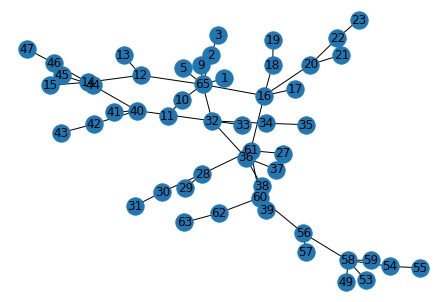

In [ ]:
# instanciamos el grafo
almost_tree = nx.generators.classic.binomial_tree(6)
almost_tree.add_edge(7,8)
almost_tree.add_edge(25,26)
almost_tree.add_edge(51,52)

collapsed_tree = collapse_cicles(almost_tree)
cicles = nx.algorithms.cycles.cycle_basis(collapsed_tree)
print(f'número de ciclos: {len(cicles)}')

# graficamos el resultado
nx.draw(collapsed_tree, with_labels=True)
plt.show()

In [ ]:
prueba = nx.path_graph(4)
prueba.add_edge(3,1)
collapsed = collapse_cicles(prueba)
collapsed.edges

EdgeView([(0, 5)])

In [ ]:
dc = G = nx.DiGraph()
dc.add_edge(1,2)
dc.add_edge(2,3)
dc.add_edge(3,4)
dc.add_edge(4,2)
for node in dc.nodes:
  dc.nodes[node]['weight'] = 10
#new = collapse_cicles(dc, 100)
#new.nodes

In [29]:
#nx.draw(corrected)
#plt.savefig("graph.pdf")
def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(dc,"corrected.pdf")

NameError: ignored

# Greedy

In [ ]:
def get_size(G, V_, N, u):
    
    V = V_.copy()
    
    ans = 1;  V[u] = 1
    Q = deque([]); Q.append(u)
    while Q:
        u = Q.popleft()
        for v in G.predecessors(u):
            if not V[v]:
                ans += 1; V[v] = 1
                Q.append(v)
    
    return ans

def visit(G, V, u):
    V[u] = 1
    Q = deque([]); Q.append(u)
    while Q:
        u = Q.popleft()
        for v in G.predecessors(u):
            if not V[v]:
                V[v] = 1
                Q.append(v)
    
    return V

In [ ]:
def greedyApp(G, N, K, limit):
    
    E = []
    V = [0 for u in range(N)]
    for u in range(N):
        E.append((get_size(G, V, N, u), u))

    S = set()
    for e in E:
        if e[0] < limit:
            S.add(e[1])

    ans = []
    count = 0
    while count < K:
        maxv = 0; u = -1
        for v in S:
            s = get_size(G, V, N, v)
            if s > maxv:
                u = v
                maxv = s

        V = visit(G, V, u)
        ans.append(u)
        S.remove(u)
        count += 1

    return ans

In [ ]:
G = nx.DiGraph()

S = set()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    d = row['direccion']
    if d != 9999:
        S.add(origin)
        S.add(dest)

S = list(S)
id_ = {}; l = 0
for u in S:
    id_[u] = l
    l += 1

G = nx.DiGraph()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    d = row['direccion']
    if d != 9999:
        G.add_edge(id_[origin], id_[dest])
for node in G.nodes:
    G.nodes[node]['weight'] = 100
    
N = l

In [ ]:
ans = greedyApp(G, N, 10, 2000)
print(ans)

for u in ans:
    print(get_size(G, [0 for v in range(N)], N, u))